# Further Hypothesis Testing

## Chapter 1. Comparing means and variances.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### 1.2 Comparing variances of two groups

Let's look again at only types 4 and 5 (supergiant and hypergiant). These are of particular interest to your supervisor. Recent research has noticed that supergiants and hypergiants seem to have very similar luminosity distributions. You are asked to check whether they have a similar mean value.

#### i) Explore data

Let's look again at only types 4 and 5 (supergiant and hypergiant). These are of particular interest to your supervisor. Recent research has noticed that supergiants and hypergiants seem to have very similar luminosity distributions. You are asked to check whether they have a similar mean value.

In [3]:
# Load data
data = pd.read_csv("stars.csv")
type_key = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant','Hypergiant']

#### ii) Q-Q plot

The [*quantile-quantile plot*](https://en.wikipedia.org/wiki/Q–Q_plot) (Q-Q plot) is a simple, graphical method to check whether two sets of observations appear to come from the same distribution, or to compare one set of data to a theoretical distribution.

It is made by plotting the quantiles (i.e. percentiles) of the two distributions against each other.

If the variances are the same, the Q-Q plot will approximate a straight line with gradient 1.

We can find the percentiles for our sample directly with `pandas`:

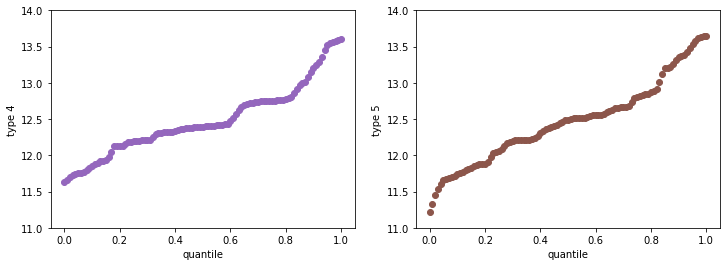

In [7]:
# Q-Q plot
type4 = data[data.type == 4].luminosity.apply(np.log)
type5 = data[data.type == 5].luminosity.apply(np.log)

x = np.linspace(0,1,101)
t4q = np.array(type4.quantile(x))
t5q = np.array(type5.quantile(x))

f = plt.figure(figsize=(12, 4))

ymin=11
ymax=14

ax = plt.subplot(121)
ax.set_xlabel('quantile')
ax.set_ylabel('type 4')
ax.set_ylim([ymin,ymax])
plt.scatter(x,t4q,color='C4')

ax = plt.subplot(122)
ax.set_xlabel('quantile')
ax.set_ylabel('type 5')
ax.set_ylim([ymin,ymax])
plt.scatter(x,t5q,color='C5')

plt.show()


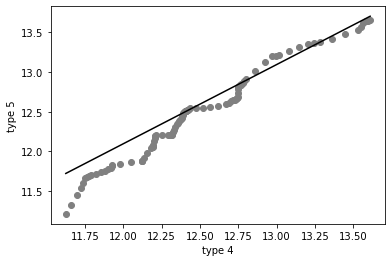

In [8]:
# Plotting type 5 against type 4
xlab = 'type 4'
ylab = 'type 5'

ax = plt.axes()
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

plt.scatter(t4q, t5q, color='gray')

# the line with gradient 1, passing through Q50:
m = 1
c = t5q[50] - t4q[50] * m
plt.plot(t4q, m * t4q + c, color='black')

plt.show()

This looks like a pretty good fit, but we can do an [*F-test*](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances) to be more rigorous:

#### iii) F-test for equality of variances

Once again, we need a two-tailed test:

$H_0$: The two populations have identical variance  $\sigma^2 = \sigma_1^2 = \sigma_2^2$.

$H_1$: The two populations have non-identical variances, $\sigma_1^2 \ne \sigma_2^2$.

The test statistic is simply the ratio of the sample variances:

$$F = \frac{s_1^2}{s_2^2}$$.

Under $H_0$, $F$ follows an [*F-distribution*](https://en.wikipedia.org/wiki/F-distribution) with parameters $(n_1 - 1,n_2 - 1)$.

We use this distribution to calculate a p-value for the observed value of the test statistic, $F$.


#### Assumpions

- The two samples both follow normal distributions.

Note that the means of the two populations may differ.
The F-test is highly sensitive to deviations from the assumption of normality.


#### Application

We will set $\alpha=0.05$.

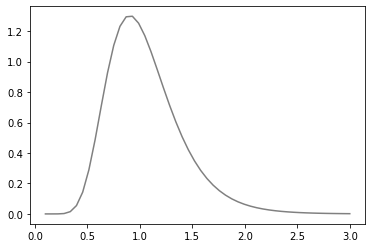

In [9]:
# Visualise the F-distribution corresponding to our example (𝑛1=𝑛2=40):
x = np.linspace(0.1,3)
plt.plot(x,stats.f.pdf(x,39,39), color='gray')
plt.show()

F = 0.7139753072500357


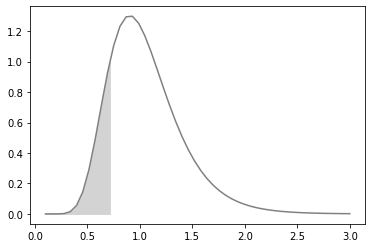

In [10]:
# We will calculate the test statistic:
fstat = type4.var()/type5.var()
print("F =",fstat)

plt.plot(x,stats.f.pdf(x,39,39), color='gray')
x_region = np.linspace(0.1,fstat,100)
plt.fill_between(x_region,stats.f.pdf(x_region,39,39),color='lightgrey')
plt.show()

In [11]:
# We use the CDF to calculate the left-tail 𝑝-value and double it for a two-tailed test:
p_value = stats.f.cdf(fstat,39,39) * 2
print("p =",p_value)

p = 0.297027010291427


Here, $p>\alpha$ so we accept the null hypothesis of equal variance, at the 5% level.

<br>